In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA




In [40]:
df=pd.read_csv('/content/wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
df.shape

(178, 14)

In [42]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [43]:
df.duplicated().sum()

np.int64(0)

Task 1: Exploratory Data Analysis (EDA):

1. Load the dataset and perform basic data exploration.

2. Examine the distribution of features using histograms, box plots, or density plots.

3. Investigate correlations between features to understand relationships within the data.

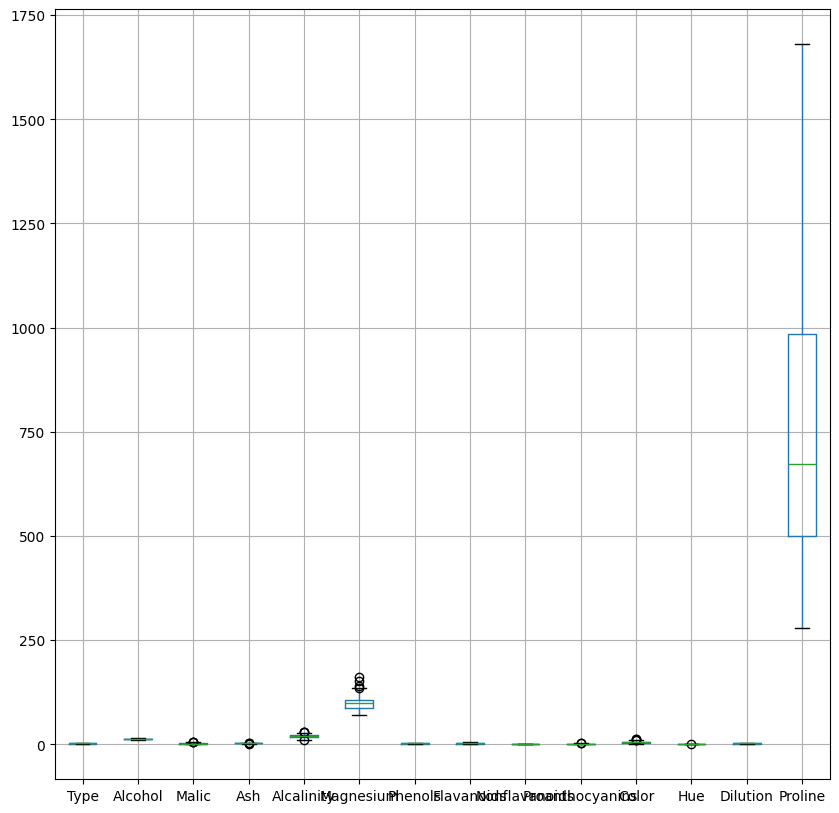

In [44]:
df.boxplot(figsize=(10,10))
plt.show()

In [45]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25) #It finds the value at the given percentile in the data. Q1=25%
    Q3=df[column].quantile(0.75) #Q3 = 75%
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)
# Each and every column is selected and done outlier capping

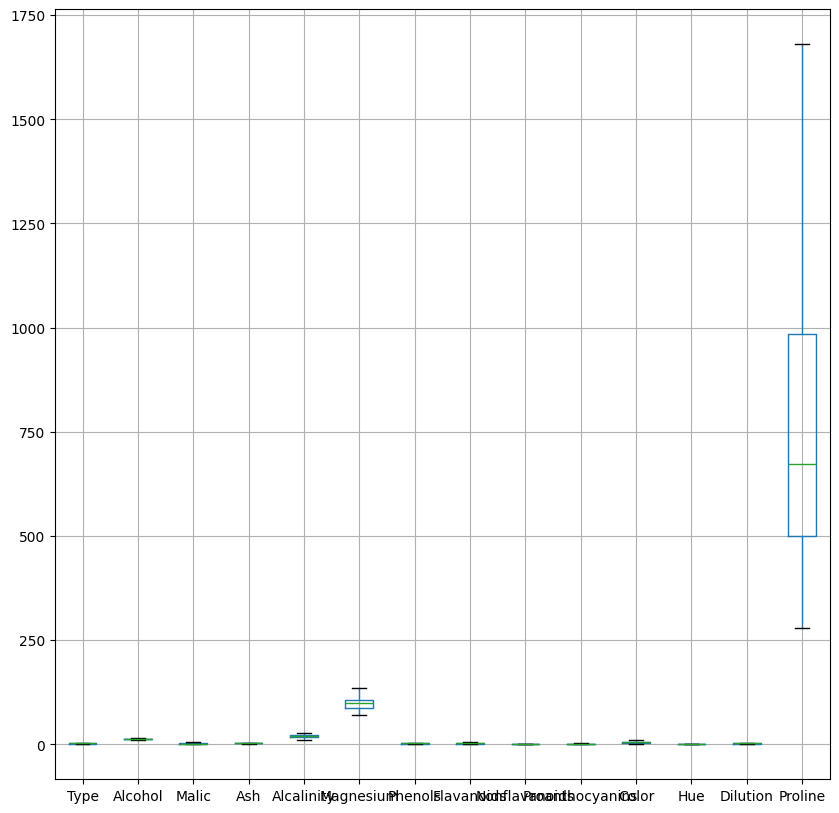

In [46]:
df.boxplot(figsize=(10,10))
plt.show()

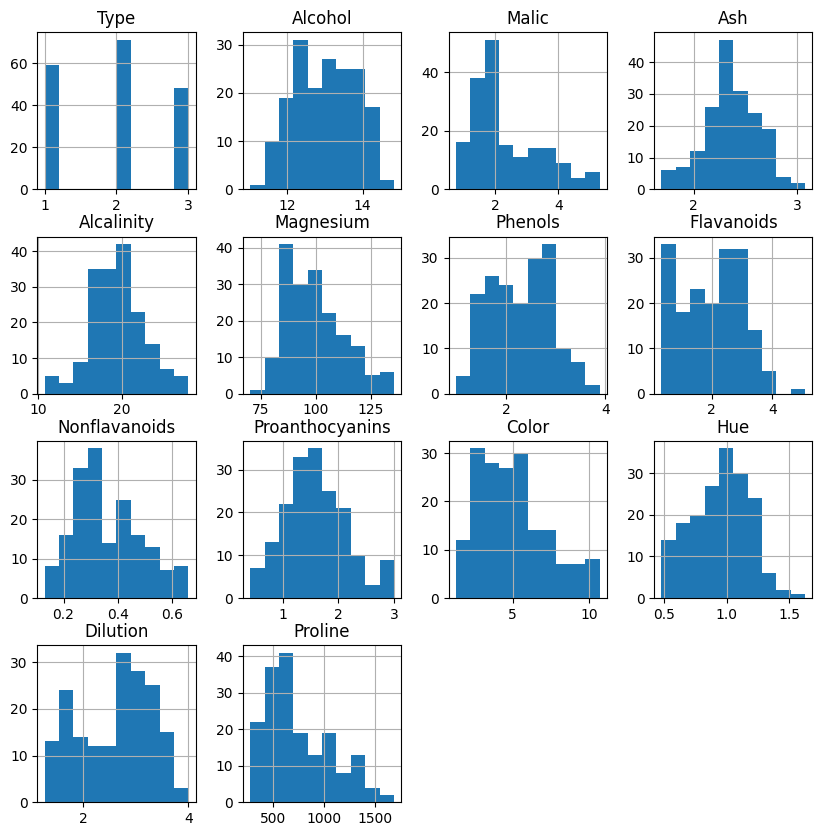

In [47]:
df.hist(figsize=(10,10))
plt.show()

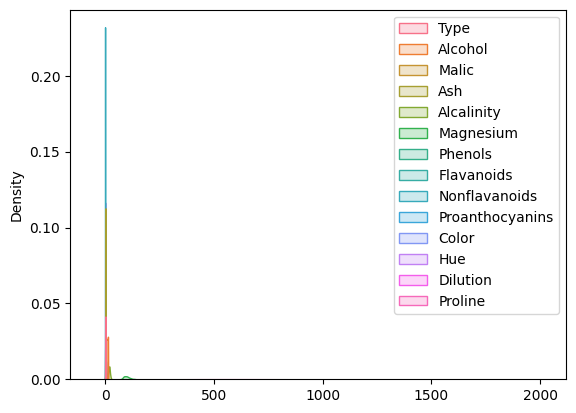

In [48]:
sns.kdeplot(data=df,shade=True)
plt.show()


In [49]:
corr=df.corr()
corr

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.440422,-0.047680,0.525608,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.260260,-0.621549,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.440422,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,-0.047680,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,0.525608,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,-0.224264,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,-0.719163,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,-0.512528,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562


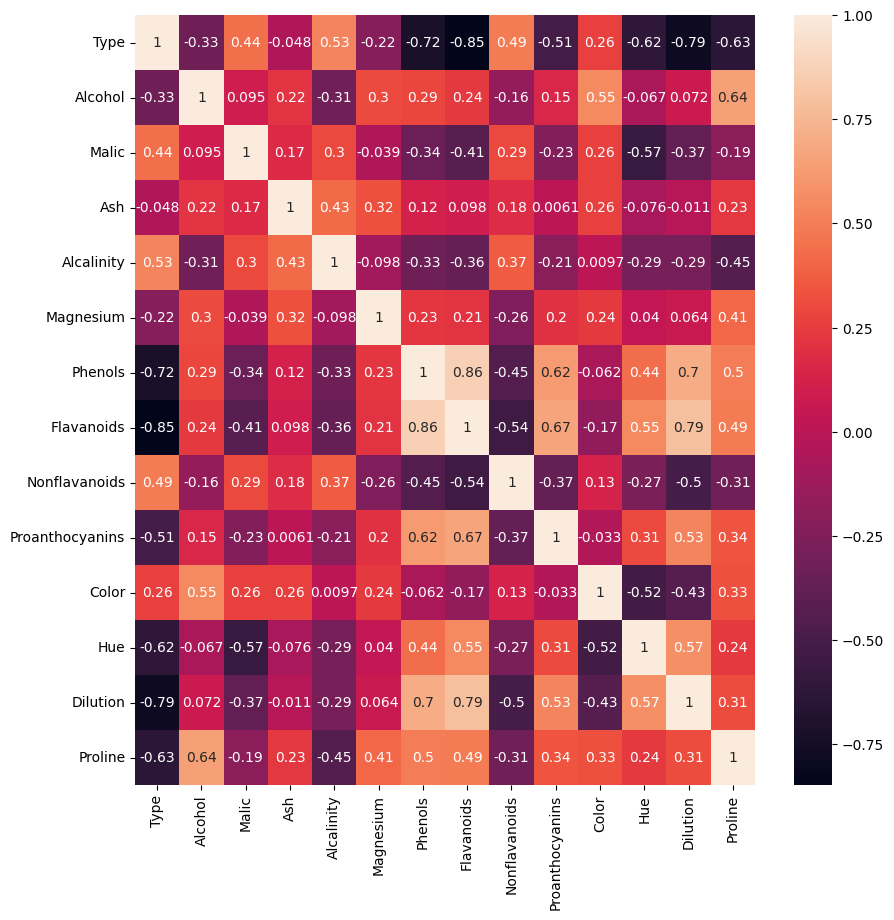

In [50]:
###heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()


Task 2: Dimensionality Reduction with PCA:

1. Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

2. Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

3. Transform the original dataset into the principal components

In [51]:
target=df[["Type"]]
features=df.drop(columns=["Type"])

In [52]:
target.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [53]:
features.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [54]:
sca=StandardScaler()
features=sca.fit_transform(features)
features=pd.DataFrame(features,columns=df.drop(columns=["Type"]).columns)

In [55]:
features.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [56]:
features.shape

(178, 13)

In [57]:
pca=PCA()
data=pca.fit_transform(features)

In [58]:
features=pd.DataFrame(data,columns=[f"PC{i+1}" for i in range(data.shape[1])])


In [59]:
features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187,-0.689257,-1.031209,-0.359055,0.599343,-0.108299
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649,0.379664,-0.208787,-0.120602,0.372289,0.003640
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401,1.164755,-0.136538,-0.289991,0.046713,0.042033
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895,-0.001904,-0.241293,0.688896,-0.318833,-0.380455
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559,-0.283486,0.036566,-0.577236,-0.165368,-0.050547


In [60]:
features.shape

(178, 13)

In [61]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [62]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_variance

array([0.36475803, 0.56085577, 0.66996759, 0.74059137, 0.8035612 ,
       0.85171187, 0.89202691, 0.91947224, 0.9417974 , 0.96110846,
       0.97866279, 0.99192912, 1.        ])

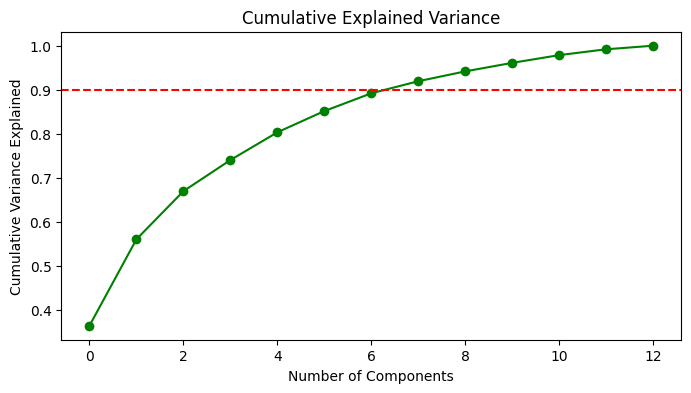

In [63]:
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='green')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [64]:
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90)+1
n_components_90

np.int64(8)

In [65]:
pca=PCA(n_components=8)

In [66]:
pca_data=pca.fit_transform(features)

In [67]:
pca_data

array([[ 3.35814747,  1.52022185, -0.12637492, ...,  0.17664455,
         0.70115415,  0.01918672],
       [ 2.22921481, -0.33326137, -2.04283756, ...,  0.98490211,
         0.04800137,  0.9916492 ],
       [ 2.54005743,  1.03695315,  1.01884481, ..., -0.53766636,
         0.41269113, -0.46440095],
       ...,
       [-2.67116907,  2.86530059, -0.97512583, ..., -0.3541478 ,
         0.85350446,  0.01348408],
       [-2.37160346,  2.39380794, -0.56148477, ..., -1.25232522,
         0.81313133,  0.35102538],
       [-3.22745394,  2.80053456,  1.03090733, ..., -0.23182472,
        -0.13011951, -0.2033248 ]])

In [68]:
pca_df=pd.DataFrame(pca_data,columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])

In [69]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559


In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [71]:
kmeans=KMeans(n_clusters=8,random_state=42)


In [72]:
clusters_orig = kmeans.fit_predict(features)

In [73]:
cluster_labels=kmeans.labels_

In [74]:
silhouette_score_org=silhouette_score(features,cluster_labels)
silhouette_score_org

np.float64(0.16868333333102986)

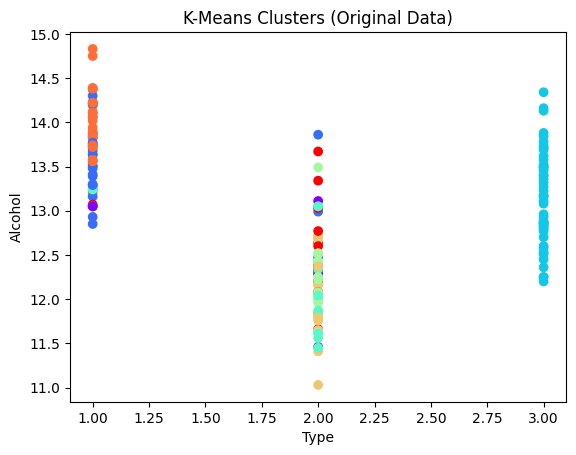

In [75]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster_labels, cmap='rainbow')
plt.title("K-Means Clusters (Original Data)")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [78]:
kmean_pca=KMeans(n_clusters=8,random_state=50)

In [80]:
clusters_pca = kmeans.fit(pca_df)

In [82]:
cluster_label=kmeans.labels_

In [83]:
silhouette_score_pca=silhouette_score(pca_df,cluster_label)

In [84]:
silhouette_score_pca

np.float64(0.15564934002001526)

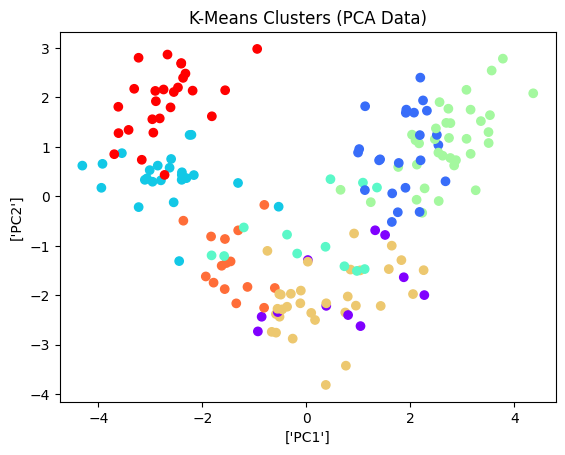

In [85]:
plt.scatter(pca_df['PC1'],pca_df['PC2'], c=cluster_label, cmap='rainbow')
plt.title("K-Means Clusters (PCA Data)")
plt.xlabel(['PC1'])
plt.ylabel(['PC2'])
plt.show()

1.Compare the clustering results obtained from the original dataset and PCA-transformed data.

In [86]:
 ## Silhouette Score: Original Data : 0.14	PCA Data:0.17

2.Discuss any similarities or differences observed in the clustering results.

In [87]:
## Similarities:
## Same general group structure:The clusters often represent the same natural groupings of samples
## Differences:
## Cluster shape and separation:In the original data, clusters may appear less clearly separated because of noise and correlated features.

3.In the original data, clusters may appear less clearly separated because of noise and correlated features.

In [88]:
## PCA reduces noise and redundant features:slightly better clustering.
## thats why original data be less clearly seprated clustering

4.Analyze the trade-offs between using PCA and clustering directly on the original dataset.

In [90]:
## Visualization after PCA is easier
## Dimensionality reduction improves speed and reduces overfitting risk.

Task 6: Conclusion and Insights

1.Summarize the key findings and insights from the assignment.

In [91]:
## PCA effectively reduced dataset dimensionality
## K-Means performed comparably or slightly better on PCA data.
## Visualization became much clearer

2.Discuss the practical implications of using PCA and clustering in data analysis

In [92]:
## Computation time is high.
## need to visualize data effectively.

3.Provide recommendations for when to use each technique based on the analysis conducted.

In [93]:
## Use PCA as a preprocessing step to simplify high-dimensional data.
## Combine PCA with other methods (like K-Means) for better generalization.